In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(5 and 10)

10


In [3]:
2+3*2

8

In [4]:
("XERGIOK".lower())

'xergiok'

In [5]:
a = [1, 2, 3, 4, 5, 6, 7]
print(a[1:6:-1])


[]


In [6]:
print(4%3)

1


In [9]:
result = np.int64(5/3)
print(result)

1


In [11]:
np.absolute(result)

1

In [13]:
print(round(232343.54736472863))

232344


In [14]:
df = pd.read_csv("/Users/thomassimmons/c/ds/titanic.csv")

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [20]:
df['Age'] = df['Age'].astype('int64')

In [22]:
df['Cabin'].isnull().sum()

687

In [23]:
df.drop(columns=['Embarked'], inplace=True)

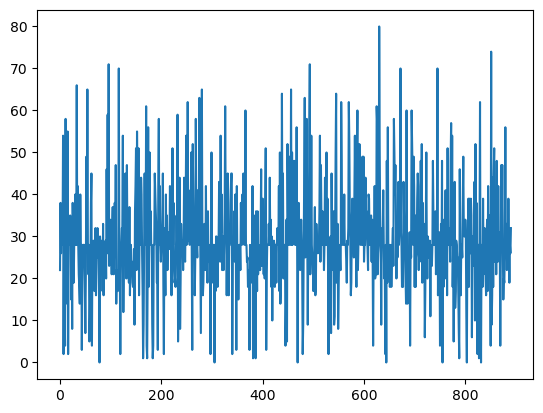

In [27]:
plt.plot(df['Age'])

In [30]:
df.groupby('Age')['Survived'].median()

Age
0     1.0
1     1.0
2     0.0
3     1.0
4     1.0
     ... 
66    0.0
70    0.0
71    0.0
74    0.0
80    1.0
Name: Survived, Length: 71, dtype: float64

In [31]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

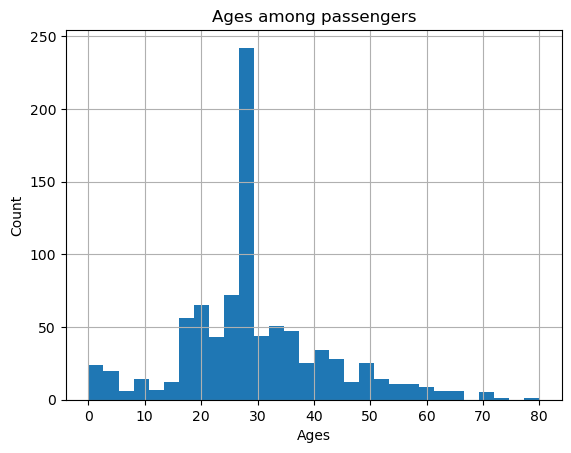

In [35]:
df['Age'].hist(bins=30)
plt.title("Ages among passengers")
plt.xlabel("Ages")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

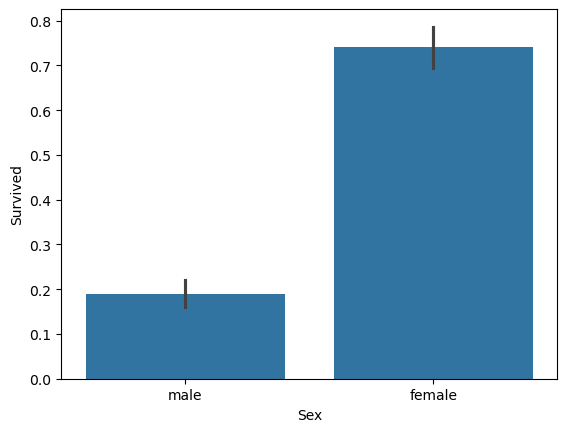

In [36]:
sns.barplot(x = "Sex", y = "Survived", data=df)

In [37]:
conn = sqlite3.connect(":memory:")

In [38]:
cursor = conn.cursor()

In [39]:
df.to_sql('titanic', conn, index=False, if_exists='replace')

891

In [41]:
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
tables = cursor.fetchall()
tables

[('titanic',)]

In [42]:
cursor.execute("PRAGMA table_info (titanic);")
cursor.fetchall()

[(0, 'PassengerId', 'INTEGER', 0, None, 0),
 (1, 'Survived', 'INTEGER', 0, None, 0),
 (2, 'Pclass', 'INTEGER', 0, None, 0),
 (3, 'Name', 'TEXT', 0, None, 0),
 (4, 'Sex', 'TEXT', 0, None, 0),
 (5, 'Age', 'INTEGER', 0, None, 0),
 (6, 'SibSp', 'INTEGER', 0, None, 0),
 (7, 'Parch', 'INTEGER', 0, None, 0),
 (8, 'Ticket', 'TEXT', 0, None, 0),
 (9, 'Fare', 'REAL', 0, None, 0),
 (10, 'Cabin', 'TEXT', 0, None, 0)]

In [44]:
query1 = """
SELECT Name, Sex, Age, Survived AS SurvivalRate
FROM titanic
WHERE Age > 50
GROUP BY Age
ORDER BY Age;"""

pd.read_sql_query(query1, conn)

,Name,Sex,Age,SurvivalRate
0,"Bateman, Rev. Robert James",male,51,0
1,"Taussig, Mr. Emil",male,52,0
2,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,1
3,"McCarthy, Mr. Timothy J",male,54,0
4,"Hewlett, Mrs. (Mary D Kingcome)",female,55,1
5,"Smith, Mr. James Clinch",male,56,0
6,"Kirkland, Rev. Charles Leonard",male,57,0
7,"Bonnell, Miss. Elizabeth",female,58,1
8,"Coxon, Mr. Daniel",male,59,0
9,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60,1


In [45]:
query2 = """
SELECT Name, Sex, Age
FROM titanic
GROUP BY Age
LIMIT 10;"""

pd.read_sql_query(query2, conn)

,Name,Sex,Age
0,"Caldwell, Master. Alden Gates",male,0
1,"Panula, Master. Eino Viljami",male,1
2,"Palsson, Master. Gosta Leonard",male,2
3,"Laroche, Miss. Simonne Marie Anne Andree",female,3
4,"Sandstrom, Miss. Marguerite Rut",female,4
5,"West, Miss. Constance Mirium",female,5
6,"Harper, Miss. Annie Jessie ""Nina""",female,6
7,"Panula, Master. Juha Niilo",male,7
8,"Palsson, Miss. Torborg Danira",female,8
9,"Ford, Miss. Robina Maggie ""Ruby""",female,9
